# Introduction to Dataset and Overview 

As part of the Udacity Data Analysis Nanodegree's Intro to Data Analysis project, I will examine the Titanic Survival rate dataset. This dataset contains the following columns: 

- Passenger ID: the number that differentiates passengers 
- Survived: Whether the passenger survived the accident or not (independent variable)
    - 0 = No, 1 = Yes 
- Pclass: Passenger class which indicates the passenger's socioeconomic class. 
    - 1 = 1st, 2 = 2nd, 3 = 3rd 
- Name: Passenger's name 
- Sex: Passenger's gender 
- Age: Passenger's age 
- SibSp: Number of siblings and spouses. 
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)
- Parch: Number of parents and children. 
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.
- Ticket: Passenger's ticket number 
- Fare: The price of fare the passenger paid for
- Cabin: Passenger's cabin number 
- Embarked: The port the passenger embarked from
    - S: Southampton, C = Cherbourg, Q = Queenstown 
    
Reference: https://www.kaggle.com/c/titanic/data

# Questions 

Throughout this dataset, I am interested in investigating how 5 areas of variables (age groups, gender, passenger class, fare price and number of family members) affect each passenger's survival rate. Specifically, my questions are addressed as followed: 

1) Do children have the highest survival rate compared to other age groups? Is the teenage group's survival rate different from other age groups? 

2) Are females more likely to survive than males? If so, which female age group has the highest survival rate? Which female age group has the lowest survival rate? 

3) Are people who pay more fare more likely to survive compared to people who pay less fare?

4) Are higher class passengers more likely to survive than lower class passengers? In addition, how do gender groups' survival rate vary based on their passenger class?  

5) Do passengers with family members tend to survive more than single passengers? 

# Data Acquisition and Data Cleaning 

In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%pylab inline 

sns.set()

titanic = pd.read_csv('titanic-data.csv')
titanic.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
titanic.shape

(891, 12)

In [42]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 'Age' column has 177 missing values. I will delete the rows of missing values. 
- 'Cabin' column has 687 missing values. Because there are too many missing values on this column, I will drop the entire column. 
- 'Embarked' column has 2 missing values. I will delete the rows of the missing values.
- I will delete 'PassangerId' and 'Ticket' columns since I am not going to use them. 

In [43]:
titanic.dropna(subset=['Age'], inplace=True) 

titanic.drop('Cabin', axis='columns', inplace=True)

titanic.dropna(subset=['Embarked'], inplace=True)

titanic.drop('PassengerId',axis='columns',inplace=True) 

titanic.drop('Ticket',axis='columns',inplace=True) 

In [44]:
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [45]:
titanic.shape

(712, 9)

# Data Wrangling and Exploration 

In [46]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Name        712 non-null object
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 55.6+ KB


In [47]:
print(titanic.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000
mean     0.404494    2.240169   29.642093    0.514045    0.432584   34.567251
std      0.491139    0.836854   14.492933    0.930692    0.854181   52.938648
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   20.000000    0.000000    0.000000    8.050000
50%      0.000000    2.000000   28.000000    0.000000    0.000000   15.645850
75%      1.000000    3.000000   38.000000    1.000000    1.000000   33.000000
max      1.000000    3.000000   80.000000    5.000000    6.000000  512.329200


In [48]:
titanic.describe(include=['O'])

,Name,Sex,Embarked
count,712,712,712
unique,712,2,3
top,"Sivic, Mr. Husein",male,S
freq,1,453,554


In [49]:
def correlation(x, y): #Will measure a correlation between survival rate and each variable  
    x_std = (x - x.mean())/x.std(ddof=0)
    y_std = (y - y.mean())/y.std(ddof=0)
    
    return (x_std * y_std).mean() 

## Age groups 

                 Survived
age_categorized          
<10              0.612903
<20              0.401961
20s              0.350000
30s              0.433735
40s              0.382022
50s              0.416667
60s              0.277778
70s              0.000000
80s              1.000000
Correlation between Age and Survival rate is:  -0.07797322604397754


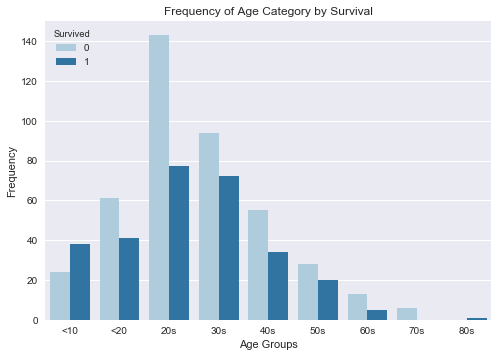

In [50]:
#Creates a function to categorize age columns into a category. 
def age_category(data): 
    if data < 10: 
        return '<10'
    elif data < 20:
        return '<20'
    elif data < 30:
        return '20s'
    elif data < 40: 
        return '30s'
    elif data < 50:
        return '40s'
    elif data < 60:
        return '50s'
    elif data < 70:
        return '60s'
    elif data < 80:
        return '70s'
    else:
        return '80s'

age = titanic['Age']
titanic['age_categorized'] = age.apply(age_category) # Apply the age column into the category function above. 
g = sns.countplot(x = titanic['age_categorized'], hue=titanic['Survived'], order=['<10','<20','20s','30s','40s','50s','60s','70s','80s'], palette='Paired')
g.set_title('Frequency of Age Category by Survival')
g.set_ylabel('Frequency')
g.set_xlabel('Age Groups')

#Since I need to order '<10' and '<20' in the beginning of the order, 
#I will use pd.Categorical to specify the order of the age category  
titanic['age_categorized'] = pd.Categorical(titanic['age_categorized'], ['<10','<20','20s','30s','40s','50s','60s','70s','80s']) 
print(titanic[['age_categorized','Survived']].groupby('age_categorized').mean())
 
#Transform the category values into numerical values 
#for computing the correlation with the survival column
mapping_age = {'<10':0,'<20':1,'20s':2,'30s':3,'40s':4,'50s':5,'60s':6,'70s':7,'80s':8 }
age_categorized = titanic['age_categorized']
titanic['mapped_age'] = age_categorized.map(mapping_age)

age_survival = correlation(titanic['mapped_age'], titanic['Survived'])
print("Correlation between Age and Survival rate is: ", age_survival)

- The less than 10 years old age group is the only age group with more passengers surviving than not. The survival ratio with this group is 61%.  
- The survival ratio for the 30 years old age group is 43%, which is the second highest survival ratio among other age groups followed by the 50 years old age group (42%), the less than 20 years old age group (40%), the 40 years old age group (38%), the 20 years old age group (35%) and the 60 years old age group (28%). 
- While the less than 10 years old age group has the highest survival rate, the less than 20 years old age group (teenage group) has the third place for the survival rate.  
- Age category is not correlated with survival rate (-0.078).

In [51]:
titanic['age_categorized'].value_counts()

20s    220
30s    166
<20    102
40s     89
<10     62
50s     48
60s     18
70s      6
80s      1
Name: age_categorized, dtype: int64

## Gender 

In [52]:
female = titanic[titanic['Sex'] == 'female']
male = titanic[titanic['Sex'] == 'male']
gender = {'male':0, 'female':1}
titanic['Sex_num'] = titanic['Sex'].map(gender) 

Female survival rate by age
                 Survived
age_categorized          
<10              0.633333
<20              0.755556
20s              0.722222
30s              0.830508
40s              0.687500
50s              0.888889
60s              1.000000
70s                   NaN
80s                   NaN
-------------------------
Male survival rate by age
                 Survived
age_categorized          
<10              0.593750
<20              0.122807
20s              0.168919
30s              0.214953
40s              0.210526
50s              0.133333
60s              0.133333
70s              0.000000
80s              1.000000
Correlation between gender and survival rate is:  0.5367616233485014


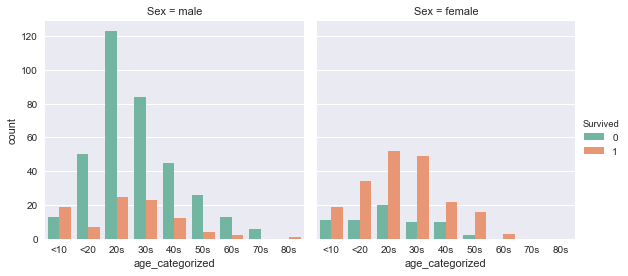

In [53]:
sns.factorplot(x='age_categorized', hue='Survived', data=titanic, col='Sex', kind='count', palette="Set2")
print('Female survival rate by age')
print(female[['age_categorized','Survived']].groupby('age_categorized').mean())
print('-------------------------')
print('Male survival rate by age')
print(male[['age_categorized','Survived']].groupby('age_categorized').mean())
sex_survival = correlation(titanic['Sex_num'], titanic['Survived'])
print('Correlation between gender and survival rate is: ', sex_survival)

- More female passengers survived than males for each age group. 
- The less than 10 years old female age group has the lowest survival rate among all age groups and the older generation tend to have a higher survival rate. 
- Gender is strongly correlated with survival rate (0.54).

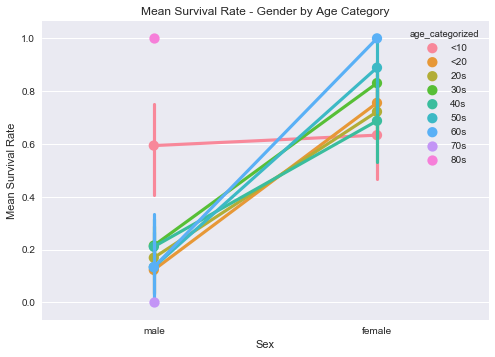

In [54]:
g = sns.pointplot(x='Sex', y='Survived', hue='age_categorized', data=titanic)
g.set_title('Mean Survival Rate - Gender by Age Category')
g.set_ylabel('Mean Survival Rate')

- Excluding 80s (only 1 passenger), male age group of less than 10 has a much higher mean survival rate with 60% although they have the lowest mean survival rate among female groups. 

## Fare 

                  Survived
Fare_grouped              
(-0.001, 7.75]    0.192771
(7.75, 7.902]     0.150000
(7.902, 9.065]    0.239437
(9.065, 12.925]   0.380282
(12.925, 15.646]  0.323944
(15.646, 26.0]    0.500000
(26.0, 29.0]      0.511628
(29.0, 46.9]      0.356164
(46.9, 79.2]      0.628571
(79.2, 512.329]   0.771429
Correlation between fare and survival rate is:  0.26609960047658027


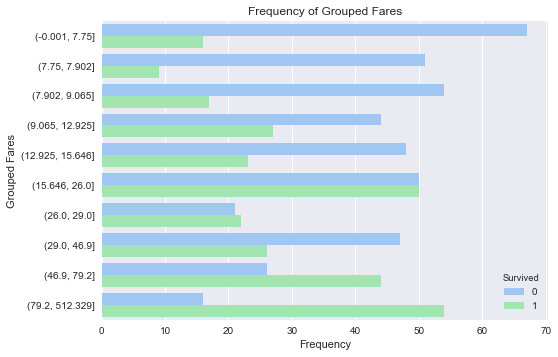

In [55]:
titanic['Fare_grouped'] = pd.qcut(titanic['Fare'], 10)
g = sns.countplot(y='Fare_grouped',hue='Survived', data=titanic, palette='pastel')
g.set_title('Frequency of Grouped Fares')
g.set_xlabel('Frequency')
g.set_ylabel('Grouped Fares')


fare_grouped = titanic[['Fare_grouped','Survived']].groupby('Fare_grouped').mean()
print(fare_grouped)

fare_survival_correlation = correlation(titanic['Survived'], titanic['Fare'])
print('Correlation between fare and survival rate is: ', fare_survival_correlation)

- People who paid from 79.2 to 512.3 dollars have the highest survival rate with 77%.
- On the other hand, people who paid from 7.75 to 7.9 dollars have the lowest survival rate with 15%. 
- Fare and survival rate seem to have a fair correlation (0.27).

## Passenger Class

Correlation between pclass and survival rate is:  -0.3564615884452376


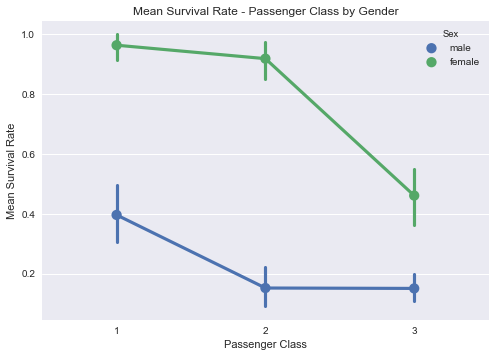

In [56]:
g = sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=titanic)
g.set_title('Mean Survival Rate - Passenger Class by Gender')
g.set_xlabel('Passenger Class')
g.set_ylabel('Mean Survival Rate')
titanic[['Pclass','Survived']].groupby('Pclass').mean()

pclass_survival_correlation = correlation(titanic['Pclass'], titanic['Survived'])
print('Correlation between pclass and survival rate is: ', pclass_survival_correlation)

- As the table illustrates above, 1st class passengers have the highest survival rate compared to 3rd class passengers. 

- For female passengers, there is a big gap in survival rate between being a 1st and 2nd class passenger and being a 3rd class passenger. For male passengers, being a 1st class passanger plays a bigger role for survival compared with 2nd and 3rd class passengers whose survival rate almost seems analogous. 

- A correlation seems to exist between passenger class and surivival rate(-0.36) as the class goes up, the survival rate goes down. 

- 3rd class female passengers have a slightly higher survival rate compared to 1st class male passengers. 

## Family members 

Correlation between the number of family and survival rate is:  0.04506766048263239
        Survived
family          
0       0.318408
1       0.546763
2       0.569892
3       0.777778
4       0.272727
5       0.136364
6       0.333333
7       0.000000


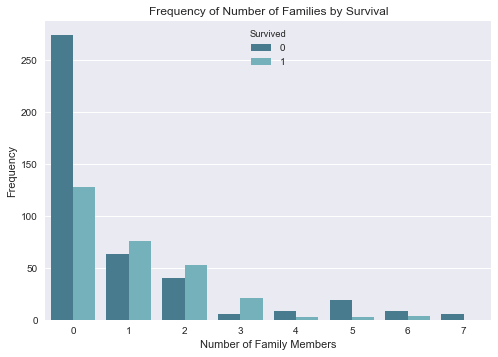

In [57]:
titanic['family'] = titanic['SibSp'] + titanic['Parch']
g = sns.countplot(x='family', hue='Survived', data=titanic, palette='GnBu_d')
g.set_title('Frequency of Number of Families by Survival')
g.set_ylabel('Frequency')
g.set_xlabel('Number of Family Members')

titanic[['family','Survived']].groupby('family').mean()

family = titanic['family']
survive = titanic['Survived']
family_survive = correlation(family, survive)
print('Correlation between the number of family and survival rate is: ',family_survive)

print(titanic[['family','Survived']].groupby('family').mean())

- If you are single or have more than 4 family members, you are not very likely to survive. 
- Passengers with three family members have the highest survival rate with 77% followed by passengers with two and one family members. 
- Number of family members and survival rate are not correlated (0.045).

## Limitations 

#### Age 
The 'Age' column had 177 missing values and I chose to drop those missing values instead of replacing them with the average age of the column with 29 years old. Adding an extra 177 data points to the 20 years old age category increased the 20 years old category by 397 data points.This would unfairly distribute the age category brackets. If those 177 data points were available, it would have provided a more fair measurement of survival rate by age category and gender age category. 


#### Fare
I chose to discretize the 'Fare' column with a quantile base. In the 'Fare' column, 81% of the passengers paid less than 51 dollars. In order to capture the trend of the survival rate while the fare prices increase, the qcut method was the solution for evenly binning those 81% of passengers. However, the side-effect was that the last bin ended up having a much wider range of fares (79 to 512 dollars) compared to the rest of the bins, which would create less variation of the fare binning categories. 

## Conclusion 

Throughout this project, I investigated how age groups, gender, fare price, passenger class and numbers of family members affect the survival rate of those on board during the Titanic incident. 

- Children less than 10 years old have the highest survival rate compared to other age groups overall excluding an outlier of one passenger who was 80 year's old. The teenage group (less than 20 years old) has the lower survival rate compared to the age group in their 30's. Because 177 data points are missing from the dataset, these figures do not fairly describe the whole age distribution of the Titanic incident. 

- The female's survival rate is higher than male's survival rate throughout the entire age groups. What's noteworthy is that male children under 10 have the highest survival rate of 60% while the females under 10 have the lowest survival rate among all female age groups. Gender has the highest correlation rate among all variables.

- Passengers who pay more fare seem to survive more than passengers who pay less with a fair correlation of 0.27. Because I chose to equally distribute passengers with each bin, the bin with 79 to 512 dollars has a much wider range of fares compared to other bins with a narrower range of fares. Therefore, these bins may not fairly represent the correlation between fare price and survival rate. 

- 1st class passengers tend to survive more than 3rd class passengers as they are negatively correlated with -0.36. For female passengers, being a 1st and 2nd class passenger increases your survival likelihood than being a 3rd class passenger. On the other hand, for males, being a 1st class passenger increased your survival likelihood. 

- Those with 3 family members have a higher survival likelihood with 77% followed by having 2 (57%) and 1 (55%) family  members compared to being single which has a survival rate of 0.3. For families, the number of family members does not have a strong correlation with survival rate. Though your likelihood of survival seems to increase significantly between a single passenger and a passenger travelling as part of a family with 3 members. 

### References

- http://seaborn.pydata.org/tutorial/color_palettes.html
- https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
- http://seaborn.pydata.org/tutorial/categorical.html
- http://seaborn.pydata.org/tutorial/color_palettes.html 
- https://seaborn.pydata.org/generated/seaborn.factorplot.html
- https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot